In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20191125

@author: zhangji

test the linear relationship
U_t =?= U_sh + U_wm
U_t is the total velocity
U_sh is the velocity induced by shear flow
U_wm is the active velocity. 
"""

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

import os
import glob
import re
import pandas as pd
from scanf import scanf
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, spatial, sparse, optimize
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pickle

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from matplotlib import ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from time import time
from src import support_class as spc
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb

# %matplotlib notebook

%matplotlib inline
rc('animation', html='html5')
rc('text', usetex=True)
params = {'text.latex.preamble': [r'\usepackage{bm}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)
fontsize = 40
figsize = (30, 16)
PWD = os.getcwd()

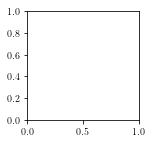

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [185]:
from shutil import copyfile

# pickle_name = 'ecoC01B05_baseFlow'
# mdf_pickle_name = 'ecoC01B05_baseFlow_mdf'

# pickle_name = 'ecoB01_baseFlow'
# mdf_pickle_name = 'ecoB01_baseFlow_mdf'

# pickle_name = 'hlxC02B05_baseFlow'
# mdf_pickle_name = 'hlxC02B05_baseFlow_mdf'

# pickle_name = 'hlxC03B05_baseFlow'
# mdf_pickle_name = 'hlxC03B05_baseFlow_mdf'

pickle_name = 'ecoB05_baseFlow4'
mdf_pickle_name = 'ecoB05_baseFlow4_mdf'

pickle_name = 'ecoB03B05_baseFlow'
mdf_pickle_name = 'ecoB03B05_baseFlow_mdf'

with open('%s.pickle' % pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, 3:])

t1 = pickle_dict['uw_Base_list'].copy()
# for i0 in (0, 6, 7, 8, 9):
for i0 in (0, 1, 2, 3, 4, 5, 6, 7, 8, 9):
    t1[i0] = np.zeros_like(t1[i0])
t1[2][5] = pickle_dict['uw_Base_list'][2][5]
ta1 = (pickle_dict['uw_Base_list'][4][3] + pickle_dict['uw_Base_list'][5][4]) / 2
ta2 = (pickle_dict['uw_Base_list'][4][4] - pickle_dict['uw_Base_list'][5][3]) / 2
t1[4][3] = ta1
t1[4][4] = ta2
t1[5][3] = -ta2
t1[5][4] = ta1
t1[9] = pickle_dict['uw_Base_list'][9]
display(np.vstack(t1)[1:6, 3:])

# # t1[2][5] = pickle_dict['uw_Base_list'][2][5]
# ta2 = (pickle_dict['uw_Base_list'][4][4] + pickle_dict['uw_Base_list'][5][3]) / 2
# t1[3][5] = pickle_dict['uw_Base_list'][3][5]
# t1[4][4] = pickle_dict['uw_Base_list'][4][4]
# t1[5][3] = pickle_dict['uw_Base_list'][5][3]
# # t1[4][4] = -ta2
# # t1[5][3] = -ta2
# t1[9] = pickle_dict['uw_Base_list'][9]
# display(np.vstack(t1)[1:6, 3:])

pickle_dict['uw_Base_list'] = t1
tname = '%s.pickle' % mdf_pickle_name
with open(tname, 'wb') as handle:
    pickle.dump(pickle_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
copyfile(tname, os.path.join(os.getcwd(), os.pardir, os.pardir, 'src', tname))
print('save table_data to %s' % tname)


array([[ 0.01918099,  0.00645598,  0.00301099],
       [ 0.05175448, -0.01726388,  0.13302732],
       [-0.00587169,  0.02216605,  0.03909139],
       [-0.01467631,  0.91704157, -0.03815134],
       [-0.92593202, -0.01532141,  0.00121409]])

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.13302732],
       [ 0.        ,  0.        ,  0.        ],
       [-0.01499886,  0.9214868 ,  0.        ],
       [-0.9214868 , -0.01499886,  0.        ]])

save table_data to ecoB03B05_baseFlow_mdf.pickle


In [258]:
from shutil import copyfile

pickle_name = 'ecoC01B05_baseFlow'
mdf_pickle_name = 'ecoC01B05_baseFlow_avr'

with open('%s.pickle' % pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, :3])
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, 3:])
display(np.vstack(pickle_dict['uw_Base_list'])[9, :])

t1 = pickle_dict['uw_Base_list'].copy()
# for i0 in (0, 6, 7, 8, 9):
for i0 in (1, 2, 3, 4, 5, ):
    t1[i0] = np.zeros_like(t1[i0])
# w
t1[2][5] = pickle_dict['uw_Base_list'][2][5] / 2
ta1 = (pickle_dict['uw_Base_list'][4][3] + pickle_dict['uw_Base_list'][5][4]) / 2 * 1
ta2 = (pickle_dict['uw_Base_list'][4][4] - pickle_dict['uw_Base_list'][5][3]) / 2 * 1
# t1[2][5] = -0.085985 * 10
# ta1 = 0.234483 * 10
# ta2 = -0.087434 * 10
t1[4][3] = ta1
t1[4][4] = ta2
t1[5][3] = -ta2
t1[5][4] = ta1
display(np.vstack(t1)[1:6, 3:])
# u
t1[2][2] = pickle_dict['uw_Base_list'][2][2] / 2
ta1 = (pickle_dict['uw_Base_list'][4][0] + pickle_dict['uw_Base_list'][5][1]) / 2
ta2 = (pickle_dict['uw_Base_list'][4][1] - pickle_dict['uw_Base_list'][5][0]) / 2
t1[4][0] = ta1
t1[4][1] = ta2
t1[5][0] = -ta2
t1[5][1] = ta1
display(np.vstack(t1)[1:6, :3])
display(np.vstack(t1)[9, :])

pickle_dict['uw_Base_list'] = t1
tname = '%s.pickle' % mdf_pickle_name
with open(tname, 'wb') as handle:
    pickle.dump(pickle_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
copyfile(tname, os.path.join(os.getcwd(), os.pardir, os.pardir, 'src', tname))
print('save table_data to %s' % tname)


array([[ 8.73490227e-03, -3.04951663e-04,  9.22176811e-05],
       [-1.77658091e-02, -1.73520598e-02, -5.82374515e-02],
       [ 5.32147082e-03,  4.78599433e-03,  6.07358035e-03],
       [ 9.87611809e-03, -1.79897016e-02,  1.37028527e-02],
       [ 2.13276729e-02, -6.80206271e-04,  6.09546251e-03]])

array([[-0.00628201, -0.00359604, -0.26093982],
       [-0.03146625,  0.02636917,  0.0252918 ],
       [ 0.00262137, -0.01267284,  0.53868783],
       [-0.00136997,  0.93545887,  0.02544567],
       [-0.98074473, -0.02252829,  0.00462777]])

array([ 6.35418425e-04, -2.19676135e-03,  4.02494122e-03, -1.31786126e-03,
       -1.23559401e-03, -7.57100877e-01])

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.0126459 ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.01194913,  0.9581018 ,  0.        ],
       [-0.9581018 , -0.01194913,  0.        ]])

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.02911873],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.00459796, -0.01965869,  0.        ],
       [ 0.01965869,  0.00459796,  0.        ]])

array([ 6.35418425e-04, -2.19676135e-03,  4.02494122e-03, -1.31786126e-03,
       -1.23559401e-03, -7.57100877e-01])

save table_data to ecoC01B05_baseFlow_avr.pickle


In [7]:
from tabulate import tabulate

# pickle_name = 'ecoB01B05_baseFlow'
pickle_name = 'ecoC01B05_baseFlow'
# pickle_name = 'ecoC01B05_baseFlow_avr'
# pickle_name = 'ellipsoidB05_baseFlow'
with open('%s.pickle' % pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, :3])
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, 3:])
display(np.vstack(pickle_dict['uw_Base_list'])[9, :])

print(tabulate(np.vstack(pickle_dict['uw_Base_list'])[1:6, :3], tablefmt="latex", floatfmt=".2e"))
display(pickle_dict['problem_kwargs'])

array([[ 8.73490227e-03, -3.04951663e-04,  9.22176811e-05],
       [-1.77658091e-02, -1.73520598e-02, -5.82374515e-02],
       [ 5.32147082e-03,  4.78599433e-03,  6.07358035e-03],
       [ 9.87611809e-03, -1.79897016e-02,  1.37028527e-02],
       [ 2.13276729e-02, -6.80206271e-04,  6.09546251e-03]])

array([[-0.00628201, -0.00359604, -0.26093982],
       [-0.03146625,  0.02636917,  0.0252918 ],
       [ 0.00262137, -0.01267284,  0.53868783],
       [-0.00136997,  0.93545887,  0.02544567],
       [-0.98074473, -0.02252829,  0.00462777]])

array([ 6.35418425e-04, -2.19676135e-03,  4.02494122e-03, -1.31786126e-03,
       -1.23559401e-03, -7.57100877e-01])

\begin{tabular}{rrr}
\hline
  8.73e-03 & -3.05e-04 &  9.22e-05 \\
 -1.78e-02 & -1.74e-02 & -5.82e-02 \\
  5.32e-03 &  4.79e-03 &  6.07e-03 \\
  9.88e-03 & -1.80e-02 &  1.37e-02 \\
  2.13e-02 & -6.80e-04 &  6.10e-03 \\
\hline
\end{tabular}


{'MPISIZE': 24,
 'Tfct': 1,
 'basei': 1,
 'belemshandle': 'belems',
 'bnodeshandle': 'bnodes',
 'center': array([0, 0, 0]),
 'ch': 3.0,
 'dist_hs': 0.5,
 'ds': 0.023333,
 'eT': -1.0,
 'eh': -1.0,
 'es': -1.0,
 'ffweightT': 2.0,
 'ffweightx': 2.0,
 'ffweighty': 2.0,
 'ffweightz': 2.0,
 'field_range': array([[-3, -3, -3],
        [ 3,  3,  3]]),
 'fileHandle': 'ecoC01B05_baseFlow',
 'getConvergenceHistory': False,
 'hfct': 1.0,
 'int_epsabs': 1e-200,
 'int_epsrel': 1e-10,
 'int_limit': 1000,
 'left_hand': False,
 'ls': 1.0,
 'matname': 'body1',
 'matrix_method': 'pf',
 'n_grid': array([10, 10, 10]),
 'n_node_threshold': 5000,
 'n_tail': 1,
 'ntT': 20,
 'nth': 20,
 'ph': 0.666667,
 'pickProblem': False,
 'plot_geo': False,
 'precondition_method': 'none',
 'rT1': 0.2,
 'rT2': 0.03,
 'region_type': 'rectangle',
 'rel_Uh': array([0., 0., 0., 0., 0., 0.]),
 'rel_Us': array([0., 0., 0., 0., 0., 0.]),
 'repeat_n': 1,
 'restart': False,
 'rh1': 0.2,
 'rh11': 0.3,
 'rh12': 0.1,
 'rh2': 0.03,
 'ro

In [6]:
0.666667 * 3

2.000001

In [234]:
pickle_name = 'ecoC01B05_baseFlow'
pickle_name = 'ecoB01B05_baseFlow'
# pickle_name = 'ecoB03B05_baseFlow'

with open('%s.pickle' % pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)

pickle_dict['problem_kwargs']

{'MPISIZE': 24,
 'Tfct': 1,
 'basei': 1,
 'belemshandle': 'belems',
 'bnodeshandle': 'bnodes',
 'center': array([0, 0, 0]),
 'ch': 3.0,
 'dist_hs': 0.5,
 'ds': 0.023333,
 'eT': -1.0,
 'eh': -1.0,
 'es': -1.0,
 'ffweightT': 2.0,
 'ffweightx': 2.0,
 'ffweighty': 2.0,
 'ffweightz': 2.0,
 'fileHandle': 'ecoB03B05_baseFlow',
 'getConvergenceHistory': False,
 'hfct': 1.0,
 'hlx_ini_rot_phi': 0,
 'hlx_ini_rot_theta': 0,
 'int_epsabs': 1e-200,
 'int_epsrel': 1e-10,
 'int_limit': 1000,
 'left_hand': False,
 'ls': 1.0,
 'matname': 'body1',
 'matrix_method': 'pf',
 'n_node_threshold': 5000,
 'n_tail': 1,
 'ntT': 10,
 'nth': 10,
 'ph': 0.666667,
 'pickProblem': False,
 'plot_geo': False,
 'precondition_method': 'none',
 'rT1': 0.2,
 'rT2': 0.03,
 'rel_Uh': array([0., 0., 0., 0., 0., 0.]),
 'rel_Us': array([0., 0., 0., 0., 0., 0.]),
 'repeat_n': 1,
 'restart': False,
 'rh1': 0.2,
 'rh11': 0.3,
 'rh12': 0.3,
 'rh2': 0.03,
 'rot_norm': array([1, 0, 0]),
 'rot_theta': 0,
 'rs1': 0.5,
 'rs2': 0.166667,

In [103]:
beta = lambda theta, phi, psi: np.array((np.cos(psi)*(-(np.cos(phi)*np.cos(psi)*np.cos(theta)) + np.sin(phi)*np.sin(psi))*np.sin(theta),np.cos(phi)*np.cos(theta)*np.sin(theta),(2*np.cos(2*psi)*np.sin(phi)*np.sin(theta) + np.cos(phi)*np.sin(2*psi)*np.sin(2*theta))/4.,(np.cos(phi)*np.cos(psi)*np.cos(2*theta) - np.cos(theta)*np.sin(phi)*np.sin(psi))/2.,(-(np.cos(psi)*np.cos(theta)*np.sin(phi)) - np.cos(phi)*np.cos(2*theta)*np.sin(psi))/2.))
pickle_name = 'ecoC01B05_baseFlow'

# pickle_name = 'ecoC01B05_left_baseFlow'
with open('%s.pickle' % pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, 3:])

omega_E = np.vstack(pickle_dict['uw_Base_list'])[1:6, 5]
omega_all = lambda theta, phi, psi: beta(theta, phi, psi) * omega_E
omega_123 = lambda x: np.sum(omega_all(x[0], x[1], x[2])[0:3])
omega_123_ngt = lambda x: -1 * np.sum(omega_all(x[0], x[1], x[2])[0:3])
# def omega_123(theta, phi, psi):
#     return np.sum(omega_all(theta, phi, psi)[0:3])
omega_45 = lambda x: np.sum(omega_all(x[0], x[1], x[2])[3:])

omega_123((0, 0, 0))

array([[-0.00628201, -0.00359604, -0.26093982],
       [-0.03146625,  0.02636917,  0.0252918 ],
       [ 0.00262137, -0.01267284,  0.53868783],
       [-0.00136997,  0.93545887,  0.02544567],
       [-0.98074473, -0.02252829,  0.00462777]])

0.0

In [180]:
bounds = ((0, np.pi), (0, 2 * np.pi), (0, 2 * np.pi))
omega_fun, thre = omega_45, -0.01293
omega_fun, thre = omega_123, -0.2992

for _ in range(10):
    x_ini = np.random.sample(3) * (np.pi, 2 * np.pi, 2 * np.pi)
#     x_ini = np.hstack((np.pi / 2, np.random.sample(2) * (2 * np.pi, 2 * np.pi)))
    x_opt = optimize.minimize(omega_fun, x_ini, bounds=bounds)
    if x_opt.fun < thre:
        print('%.15f' % x_opt.fun, np.array(x_opt.x) / np.pi)
#         print('%.15f' % x_opt.fun, (x_opt.x[1] + x_opt.x[2]) / np.pi, (x_opt.x[1] - x_opt.x[2]) / np.pi)

-0.299280039768691 [0.50000107 0.50000285 1.42820861]
-0.299280039800997 [0.50000109 1.500001   0.9282073 ]
-0.299280039803084 [0.49999993 0.49999969 0.42820688]
-0.299280039802826 [0.50000004 0.49999997 1.42820723]
-0.299280039721597 [0.50000622 0.5000019  1.42820655]
-0.299280039803145 [0.50000037 1.50000017 1.92820693]
-0.299280039803074 [0.49999958 1.49999986 0.92820689]
-0.299280039802491 [0.50000047 0.50000037 1.42820695]
-0.299280039803261 [0.49999992 1.49999994 0.92820688]


In [148]:
x_opt.fun

-0.012931535951450735

In [235]:
# pickle_name = 'ecoC01B05_baseFlow'
# pickle_name = 'ecoC01B05_left_baseFlow'
# pickle_name = 'ecoB01B05_baseFlow'
# pickle_name = 'ecoB03B05_baseFlow'
# pickle_name = 'ellipsoidB05_baseFlow'
pickle_name = 'ecoC01B05_baseFlow_avr'

with open('%s.pickle' % pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, :3])
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, 3:])
display(np.vstack(pickle_dict['uw_Base_list'])[9, :])
# pickle_dict['problem_kwargs']

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.02911873],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.00459796, -0.01965869,  0.        ],
       [ 0.01965869,  0.00459796,  0.        ]])

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.0126459 ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.01194913,  0.9581018 ,  0.        ],
       [-0.9581018 , -0.01194913,  0.        ]])

array([ 6.35418425e-04, -2.19676135e-03,  4.02494122e-03, -1.31786126e-03,
       -1.23559401e-03, -7.57100877e-01])

In [ ]:
0.28

In [210]:
# pickle_name = 'ecoC01B05_baseFlow'
# pickle_name = 'ecoB01B05_baseFlow'
# pickle_name = 'ecoB03B05_baseFlow'
# pickle_name = 'ecoC01B05_left_baseFlow'
# pickle_name = 'ecoB01B05_left_baseFlow'
# pickle_name = 'ecoB03B05_left_baseFlow'
# pickle_name = 'ellipsoidB05_baseFlow'

with open('%s.pickle' % pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)
# display(np.vstack(pickle_dict['uw_Base_list'])[1:6, :3])
# display(np.vstack(pickle_dict['uw_Base_list'])[1:6, 3:])
# display(np.vstack(pickle_dict['uw_Base_list'])[9, :])
pickle_dict['problem_kwargs']['left_hand']

True

In [220]:
from shutil import copyfile

# pickle_name = 'ecoC01B05_baseFlow'
# mdf_pickle_name = 'ecoC01B05_baseFlow_mdf'

# pickle_name = 'ecoB01_baseFlow'
# mdf_pickle_name = 'ecoB01_baseFlow_mdf'

# pickle_name = 'hlxC02B05_baseFlow'
# mdf_pickle_name = 'hlxC02B05_baseFlow_mdf'

# pickle_name = 'hlxC03B05_baseFlow'
# mdf_pickle_name = 'hlxC03B05_baseFlow_mdf'

# pickle_name = 'ecoB05_baseFlow4'
# mdf_pickle_name = 'ecoB05_baseFlow4_mdf'

# pickle_name = 'ecoB01B05_left_baseFlow'
# mdf_pickle_name = 'ecoB01B05_left_baseFlow_mdf'

with open('%s.pickle' % pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, 3:])
display(np.vstack(pickle_dict['uw_Base_list'])[9, :])

t1 = pickle_dict['uw_Base_list'].copy()
# for i0 in (0, 6, 7, 8, 9):
for i0 in (0, 1, 2, 3, 4, 5, 6, 7, 8, 9):
    t1[i0] = np.zeros_like(t1[i0])
# t1[2][5] = pickle_dict['uw_Base_list'][2][5]
# ta1 = (pickle_dict['uw_Base_list'][4][3] + pickle_dict['uw_Base_list'][5][4]) / 2
# ta2 = (pickle_dict['uw_Base_list'][4][4] - pickle_dict['uw_Base_list'][5][3]) / 2
# t1[4][3] = ta1
# t1[4][4] = ta2
# t1[5][3] = -ta2
# t1[5][4] = ta1
t1[9] = pickle_dict['uw_Base_list'][9]
t1[9][[0, 1, 3, 4, 5]] = 0
# t1[9][:] = 0
display(np.vstack(t1)[1:6, 3:])

pickle_dict['uw_Base_list'] = t1
tname = '%s.pickle' % mdf_pickle_name
with open(tname, 'wb') as handle:
    pickle.dump(pickle_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
copyfile(tname, os.path.join(os.getcwd(), os.pardir, os.pardir, 'src', tname))
print('save table_data to %s' % tname)


array([[-5.27820152e-03,  3.06214703e-03, -1.23788447e-03],
       [-1.36867316e-02, -2.16925927e-02, -2.83238140e-01],
       [-2.99666884e-03, -5.66456515e-03,  1.52415513e-02],
       [ 9.18116951e-03,  9.83360649e-01,  1.13729840e-02],
       [-9.85437223e-01,  8.93287876e-03,  2.06512954e-05]])

array([ 0.00068004,  0.00244182, -0.00720577,  0.00172415, -0.00289499,
       -0.38606887])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

save table_data to ecoB01B05_left_baseFlow_mdf.pickle


In [252]:
20 / (614-598) * 75 / 24

3.90625

## toy model, test the motion of an active swimmer in bulk with very large later rotation. 

In [18]:
from shutil import copyfile

pickle_name = 'ecoC01B05_baseFlow'
mdf_pickle_name = 'ecoC01B05_baseFlow_laterRot'

with open('%s.pickle' % pickle_name, 'rb') as handle:
    pickle_dict = pickle.load(handle)
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, :3])
display(np.vstack(pickle_dict['uw_Base_list'])[1:6, 3:])
display(np.vstack(pickle_dict['uw_Base_list'])[9, :])

t1 = pickle_dict['uw_Base_list'].copy()
# for i0 in (0, 6, 7, 8, 9):
for i0 in (1, 2, 3, 4, 5, ):
    t1[i0] = np.zeros_like(t1[i0])

tfct = 10000
t1[9][:3] = 0
t1[9][3:5] = t1[9][3:5] * tfct 
display(np.vstack(t1)[1:6, :3])
display(np.vstack(t1)[9, :])

pickle_dict['uw_Base_list'] = t1
tname = '%s.pickle' % mdf_pickle_name
with open(tname, 'wb') as handle:
    pickle.dump(pickle_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
copyfile(tname, os.path.join(os.getcwd(), os.pardir, os.pardir, 'src', tname))
print('save table_data to %s' % tname)


array([[ 8.73490227e-03, -3.04951663e-04,  9.22176811e-05],
       [-1.77658091e-02, -1.73520598e-02, -5.82374515e-02],
       [ 5.32147082e-03,  4.78599433e-03,  6.07358035e-03],
       [ 9.87611809e-03, -1.79897016e-02,  1.37028527e-02],
       [ 2.13276729e-02, -6.80206271e-04,  6.09546251e-03]])

array([[-0.00628201, -0.00359604, -0.26093982],
       [-0.03146625,  0.02636917,  0.0252918 ],
       [ 0.00262137, -0.01267284,  0.53868783],
       [-0.00136997,  0.93545887,  0.02544567],
       [-0.98074473, -0.02252829,  0.00462777]])

array([ 6.35418425e-04, -2.19676135e-03,  4.02494122e-03, -1.31786126e-03,
       -1.23559401e-03, -7.57100877e-01])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

array([  0.        ,   0.        ,   0.        , -13.17861261,
       -12.35594012,  -0.75710088])

save table_data to ecoC01B05_baseFlow_laterRot.pickle


In [15]:
t1[9][3:4] * tfct 

array([-0.13178613])